<a href="https://colab.research.google.com/github/mari-rufino-g/vereadores2020/blob/main/Vereadores_SP_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
cam = pd.read_csv('Vereadores_SP_2019.csv', sep = ';', encoding = 'ISO-8859-1')

FileNotFoundError: ignored

In [ ]:
cam.head()

,ordem,Nome,Partido,Situacao,Votos,Porcentagem de votos,Genero,Raca
0,1,Eduardo Suplicy,PT,ELEITO,167552,"3,28%",M,branco
1,2,Milton Leite,DEM,ELEITO,132716,"2,59%",M,pardo
2,3,Delegado Palumbo,MDB,ELEITO,118395,"2,31%",M,branco
3,4,Felipe Becari,PSD,ELEITO,98717,"1,93%",M,branco
4,5,Fernando Holiday,PATRIOTA,ELEITO,67715,"1,32%",M,preto


In [ ]:
cam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ordem                 55 non-null     int64 
 1   Nome                  55 non-null     object
 2   Partido               55 non-null     object
 3   Situacao              55 non-null     object
 4   Votos                 55 non-null     int64 
 5   Porcentagem de votos  55 non-null     object
 6   Genero                55 non-null     object
 7   Raca                  55 non-null     object
dtypes: int64(2), object(6)
memory usage: 3.6+ KB


In [ ]:
#Verificando a lista de partidos
cam['Partido']

0               PT
1              DEM
2              MDB
3              PSD
4         PATRIOTA
5             PSOL
6             PSOL
7               PV
8               PL
9     REPUBLICANOS
10            PSDB
11            PSDB
12    REPUBLICANOS
13            PSOL
14    REPUBLICANOS
15            PSDB
16              PP
17            PSDB
18        PATRIOTA
19             DEM
20              PT
21             PSD
22              PT
23            NOVO
24             DEM
25            PSDB
26              PT
27            PSOL
28             DEM
29              PT
30            PSOL
31        PATRIOTA
32             MDB
33            PSDB
34              PT
35              PT
36              PT
37            PSDB
38              PL
39             PSB
40             DEM
41             PSD
42            PODE
43             MDB
44            PSOL
45             PSC
46             PSB
47            PODE
48            PSDB
49            PODE
50            NOVO
51    REPUBLICANOS
52          

### Verificando a quantidade de votos por gênero

In [ ]:
cam.groupby('Genero').sum()['Votos']

Genero
F     341967
M    1688626
Name: Votos, dtype: int64

<AxesSubplot:xlabel='Genero', ylabel='Votos'>

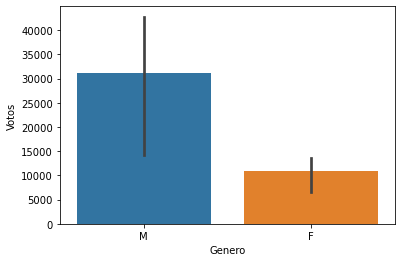

In [ ]:
sns.barplot(x='Genero',y='Votos',data=cam,estimator=np.std)

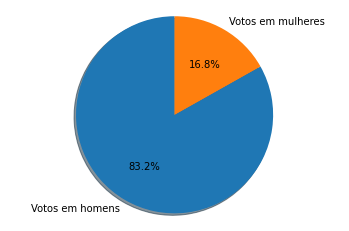

In [ ]:
labels = 'Votos em homens', 'Votos em mulheres'
sizes = [1688626, 341967]
fig1, ax1 = plt.subplots ()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

### Verificando a proporção de vereadores e vereadoras

In [ ]:
cam['Genero'].value_counts()

M    44
F    11
Name: Genero, dtype: int64

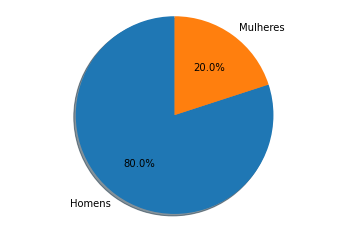

In [ ]:
labels = 'Homens', 'Mulheres'
sizes = [44, 11]
fig1, ax1 = plt.subplots ()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

### Verificando o perfil racial dos eleitos

In [ ]:
cam['Raca'].value_counts()

branco      42
preto        7
pardo        4
amarelo      1
indgena     1
Name: Raca, dtype: int64

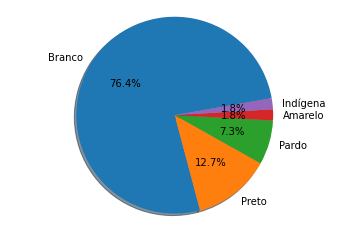

In [ ]:
labels = 'Branco', 'Preto', 'Pardo', 'Amarelo', 'Indígena'
sizes = [42, 7, 4, 1, 1]
fig1, ax1 = plt.subplots ()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=10)
ax1.axis('equal')
plt.show()

<AxesSubplot:>

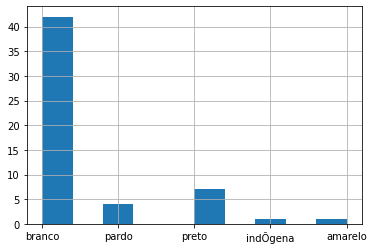

In [ ]:
cam['Raca'].hist()

### Verificando a quantidade de votos por raça/cor

In [ ]:
cam.groupby('Raca').sum()['Votos']

Raca
amarelo       25316
branco      1500656
indÕgena      28402
pardo        213080
preto        263139
Name: Votos, dtype: int64

### Adicionando uma nova coluna no df

In [ ]:
DicionarioPartidos = {
'PT': 'Esquerda',
'DEM': 'Direita',
'MDB': 'Centro',
'PSD': 'Centro',
'PATRIOTA': 'Direita',
'PSOL': 'Esquerda',
'PV': 'Esquerda',
'PL': 'Direita',
'REPUBLICANOS': 'Direita',
'PSDB': 'Centro',
'PP': 'Direita',
'NOVO': 'Direita',
'PSB': 'Esquerda',
'PODE': 'Centro',
'PSC': 'Direita',
'PTB': 'Direita',
'PSL': 'Direita'} 

In [ ]:
cam['Posicionamento Politico']  = [DicionarioPartidos[resp] for resp in cam.Partido]

In [ ]:
cam.head()

,ordem,Nome,Partido,Situacao,Votos,Porcentagem de votos,Genero,Raca,Posicionamento Politico
0,1,Eduardo Suplicy,PT,ELEITO,167552,"3,28%",M,branco,Esquerda
1,2,Milton Leite,DEM,ELEITO,132716,"2,59%",M,pardo,Direita
2,3,Delegado Palumbo,MDB,ELEITO,118395,"2,31%",M,branco,Centro
3,4,Felipe Becari,PSD,ELEITO,98717,"1,93%",M,branco,Centro
4,5,Fernando Holiday,PATRIOTA,ELEITO,67715,"1,32%",M,preto,Direita


### Verificando a quantidade de eleitos por ideologia do partido

In [ ]:
cam['Posicionamento Politico'].value_counts()

Direita     21
Esquerda    17
Centro      17
Name: Posicionamento Politico, dtype: int64

### Verificando a quantidade de eleitos de acordo com a declaração racial por ideologia do partido

#### Raça/Cor x Partidos de direita

In [ ]:
cam[cam['Posicionamento Politico'] == 'Direita'].groupby('Raca').count()

,Posicionamento Politico
Raca,
branco,16
pardo,2
preto,3


#### Raça/Cor x Partidos de esquerda

In [ ]:
cam[cam['Posicionamento Politico'] == 'Esquerda'].groupby('Raca').count()

,Posicionamento Politico
Raca,
branco,10
indÕgena,1
pardo,2
preto,4


#### Raça/Cor x Partidos de centro

In [ ]:
cam[cam['Posicionamento Politico'] == 'Centro'].groupby('Raca').count()

,Posicionamento Politico
Raca,
amarelo,1
branco,16


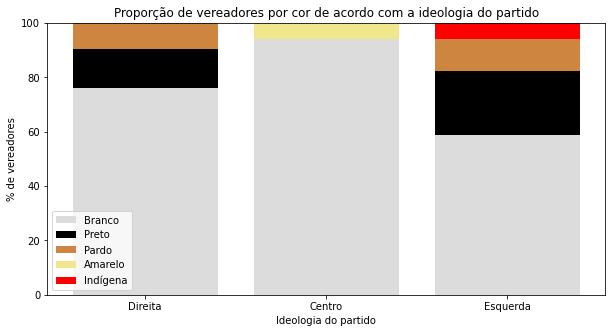

In [ ]:
branco  = np.array((76.2, 94.1, 58.8))
preto = np.array((14.3, 0, 23.6))
pardo  = np.array((9.5, 0, 11.7))
amarelo  = np.array((0, 5.9, 0))
indigena = np.array((0, 0, 5.9))

cor = ['Branco','Preto','Pardo', 'Amarelo', 'Indigena']

ideologia = ['Direita','Centro','Esquerda']


# Aumentando o gráfico
plt.figure(figsize=(10,5))

# Criando as barras
plt.bar(ideologia, branco, color = 'gainsboro')
plt.bar(ideologia, preto, color = 'black', bottom = branco)
plt.bar(ideologia, pardo, color = 'peru', bottom = branco + preto)
plt.bar(ideologia, amarelo, color = 'khaki', bottom = branco + preto+ pardo)
plt.bar(ideologia, indigena, color = 'red', bottom = branco + preto+ pardo + amarelo )

# Adiciando legendas as barras
plt.xlabel('Ideologia do partido')
plt.ylabel('% de vereadores')
plt.title('Proporção de vereadores por cor de acordo com a ideologia do partido')
plt.legend(('Branco', 'Preto', 'Pardo', 'Amarelo', 'Indígena'))

plt.show()

### Verificando a quantidade de eleitos de acordo com o gênero por ideologia do partido

#### Gênero x Partidos de direita

In [ ]:
cam[cam['Posicionamento Politico'] == 'Direita'].groupby('Genero').count()

,ordem,Nome,Partido,Situacao,Votos,Porcentagem de votos,Raca,Posicionamento Politico
Genero,,,,,,,,
F,4,4,4,4,4,4,4,4
M,17,17,17,17,17,17,17,17


#### Gênero x Partidos de esquerda

In [ ]:
cam[cam['Posicionamento Politico'] == 'Esquerda'].groupby('Genero').count()

,ordem,Nome,Partido,Situacao,Votos,Porcentagem de votos,Raca,Posicionamento Politico
Genero,,,,,,,,
F,5,5,5,5,5,5,5,5
M,12,12,12,12,12,12,12,12


#### Gênero x Partidos de centro

In [ ]:
cam[cam['Posicionamento Politico'] == 'Centro'].groupby('Genero').count()

,ordem,Nome,Partido,Situacao,Votos,Porcentagem de votos,Raca,Posicionamento Politico
Genero,,,,,,,,
F,2,2,2,2,2,2,2,2
M,15,15,15,15,15,15,15,15


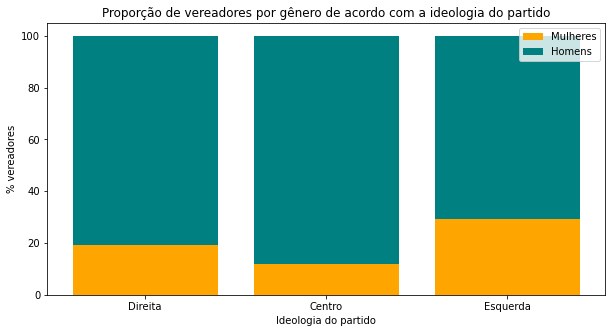

In [ ]:
mulheres  = np.array((19.1, 11.8, 29.4))
homens = np.array((80.9, 88.2, 70.6))


genero = ['Mulheres','Homens']

ideologia = ['Direita','Centro','Esquerda']


# Aumentando o gráfico
plt.figure(figsize=(10,5))

# Criando as barras
plt.bar(ideologia, mulheres, color = 'orange')
plt.bar(ideologia, homens, color = 'teal', bottom = mulheres)

# Adiciando legendas as barras
plt.xlabel('Ideologia do partido')
plt.ylabel('% vereadores')
plt.title('Proporção de vereadores por gênero de acordo com a ideologia do partido')
plt.legend(('Mulheres', 'Homens'))

plt.show()

### Verificando a quantidade de votos obtidos, por ideologia do partido e gênero

<AxesSubplot:xlabel='Posicionamento Politico', ylabel='Votos'>

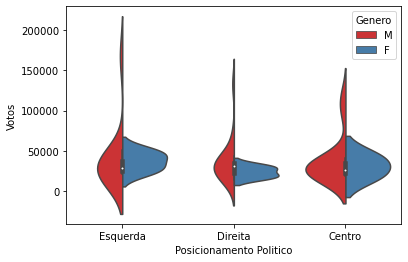

In [ ]:
sns.violinplot(x="Posicionamento Politico", y="Votos", data=cam,hue='Genero',split=True,palette='Set1')